<a href="https://colab.research.google.com/github/Orelevy0512/ML_course_project_2025/blob/main/ML_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prepare the Dataset**

In [1]:
# @title Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# @title Libraries
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# @title Load dataset

# Default path
default_path = '/content/drive/MyDrive/לימודים/תואר שלישי/ML/ML Project'

# Ask user to confirm or change the path
use_default = input(
    f"Default dataset path is:\n{default_path}\n"
    "Enter 1 to use this path, or 0 to enter a custom path: "
)


if int(use_default) == 0:
    relevant_path = input("Please enter the full path to your dataset (without quotation marks): ")
else:
    relevant_path = default_path

# Ask user to choose dataset format
dataset_choice = input(
    "\nSelect the dataset format:\n"
    "1 - Dataset with 15 selected electrodes (7 Alpha, 8 Beta)\n"
    "2 - Dataset with all 64 electrodes\n"
    "Your choice: "
)

# Determine filename
filename = "data_matrix.mat" if int(dataset_choice) == 1 else "data_matrix_64.mat"

# Load the dataset with error handling
while True: # Keep trying until file is found and valid
    try:
        data = loadmat(f"{relevant_path}/{filename}")

        # Check for expected variable
        if 'data_matrix' not in data:
            raise KeyError("Expected variable 'data_matrix' not found in the file.")

        print("✅ Data loaded successfully!")
        break  # exit the loop if successful

    except FileNotFoundError:
        print(".mat file not found. Please check the path and try again.")
        relevant_path = input("Enter the full path to your dataset (no quotation marks): ")

Default dataset path is:
/content/drive/MyDrive/לימודים/תואר שלישי/ML/ML Project
Enter 1 to use this path, or 0 to enter a custom path: 1

Select the dataset format:
1 - Dataset with 15 selected electrodes (7 Alpha, 8 Beta)
2 - Dataset with all 64 electrodes
Your choice: 2
✅ Data loaded successfully!


In [4]:
# @title Convert loaded MATLAB data into a structured DataFrame

# Extract the main variable from the .mat file
data_matrix = data['data_matrix']

# Create a list of dictionaries with the correct types for each column
rows = []
for row in data_matrix:
    rows.append({
        'part_id': int(row[0].item()),                # Participant ID as integer
        'paradigm_id': int(row[1].item()),            # Experimental condition ID as integer
        'trial_id': int(row[2].item()),               # Trial number as integer
        'feature_matrix_alpha': np.array(row[3]),     # Alpha band feature matrix (NumPy array)
        'feature_matrix_beta': np.array(row[4]),      # Beta band feature matrix (NumPy array)
        'FOOOF_Vector': np.array(row[5])              # FOOOF-derived features (NumPy array)
    })

# Convert the list of dictionaries into a Pandas DataFrame
df = pd.DataFrame(rows)

# Display the first few rows to verify structure
df.head()

,part_id,paradigm_id,trial_id,feature_matrix_alpha,feature_matrix_beta,FOOOF_Vector
0,501,1,1,"[[8.94978149947511, 8.765158850711956, 5.15795...","[[24.349405532091502, 5.751265182241305, 4.100...","[[1.1344626342198638, 1.1371462469413467, 1.13..."
1,501,1,2,"[[8.899782720148433, 20.1027615655748, 9.12728...","[[25.39937989795171, 6.001404560911581, 4.1062...","[[1.1095769616228845, 1.111377323907862, 1.113..."
2,501,2,1,"[[10.27474915163204, 99.82931974034544, 18.038...","[[23.274431776567955, 4.977471111897604, 3.674...","[[1.1103099203378315, 1.11185737844986, 1.1134..."
3,501,2,2,"[[10.674739386245452, 41.578898259327225, 14.1...","[[24.849393325358268, 5.002072226103952, 3.585...","[[1.1032191701999639, 1.1047251231070334, 1.10..."
4,501,3,1,"[[12.857213449832663, 4.941072289482722, 4.207...","[[15.007749152085532, 4.7050935845890045, 4.28...","[[1.067971832750966, 1.0684166874353163, 1.068..."


In [5]:
# @title Dataset Structure
# Print the size of the dataset (rows, columns)
print('Size of the Dataset:', df.shape)
print("=" * 100)

# Print the number of unique participants and paradigms
print(df['part_id'].nunique(), "unique participants")
print(df['paradigm_id'].nunique(), "unique paradigms")
print("=" * 100)

# Show the shape of the feature matrices for one example trial
print("Shape of Feature Matrices for a Single Trial:")
print("Alpha Matrix Shape:", df.iloc[0]['feature_matrix_alpha'].shape)
print("Beta Matrix Shape:", df.iloc[0]['feature_matrix_beta'].shape)

RS_open_fooof_shape = df[df['paradigm_id']==1].reset_index().loc[0]['FOOOF_Vector'].shape
RS_closed_fooof_shape = df[df['paradigm_id']==2].reset_index().loc[0]['FOOOF_Vector'].shape
Oddball_fooof_shape = df[df['paradigm_id']==3].reset_index().loc[0]['FOOOF_Vector'].shape
lecture_fooof_shape = df[df['paradigm_id']==4].reset_index().loc[0]['FOOOF_Vector'].shape

print(f"FOOOF Vector Shape: RS open - {RS_open_fooof_shape}, RS closed - {RS_closed_fooof_shape}, Oddball - {Oddball_fooof_shape}, Lecture- {lecture_fooof_shape}")
print("=" * 100)

# Print basic DataFrame info (column types, non-null counts, etc.)
print("Basic Info:")
df.info()

Size of the Dataset: (1383, 6)
58 unique participants
4 unique paradigms
Shape of Feature Matrices for a Single Trial:
Alpha Matrix Shape: (64, 3)
Beta Matrix Shape: (64, 3)
FOOOF Vector Shape: RS open - (1, 1519), RS closed - (1, 1519), Oddball - (1, 3295), Lecture- (1, 3346)
Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   part_id               1383 non-null   int64 
 1   paradigm_id           1383 non-null   int64 
 2   trial_id              1383 non-null   int64 
 3   feature_matrix_alpha  1383 non-null   object
 4   feature_matrix_beta   1383 non-null   object
 5   FOOOF_Vector          1383 non-null   object
dtypes: int64(3), object(3)
memory usage: 65.0+ KB


### Dataset Structure Summary

The loaded dataset includes **1,383 trials** collected from **58 participants** across **4 paradigms**.

Each trial includes:

- **Alpha Band Feature Matrix** – shape: *(7, 3)*  
  → Extracted from 7 parietal electrodes active in the 6–15 Hz range  
- **Beta Band Feature Matrix** – shape: *(8, 3)*  
  → Extracted from 8 fronto-central electrodes active in the 15–30 Hz range  

Each row (trial) in the dataset contains 3 computed features per electrode:
1. **Maximum Power**
2. **Mean Power**
3. **Frequency at Maximum Power**

In addition, each trial includes a FOOOF vector capturing the spectral decomposition of power. These vectors were averaged across selected electrodes to produce a compact frequency-domain representation. The shape of the FOOOF vector varies across paradigms due to differences in trial length:
RS Open – (1, 1519), RS Closed – (1, 1519), Oddball – (1, 3295), Lecture – (1, 3346).

> * The initial dataset (`data_matrix`) uses only a subset of electrodes (7 Alpha, 8 Beta).  
> * The extended version (`data_matrix_64`) includes all 64 electrodes, expanding the Alpha and Beta feature matrices from 7×3 and 8×3 to **64×3** each, thereby increasing both feature richness and the overall dataset size.


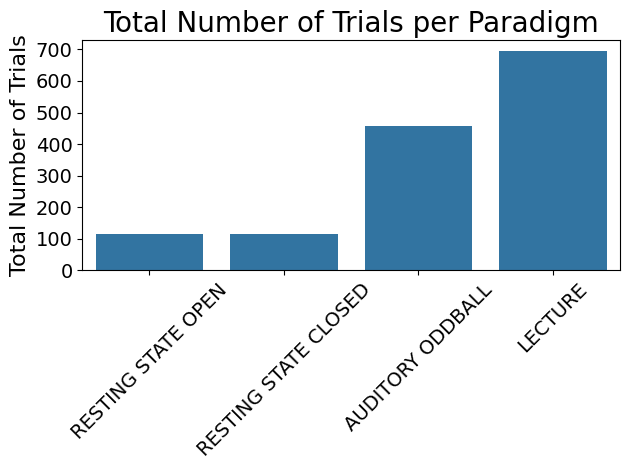

In [6]:
# @title Distribution of trials per paradigm

# Map numeric paradigm IDs to descriptive names
paradigm_names = {
    1: 'RESTING STATE OPEN',
    2: 'RESTING STATE CLOSED',
    3: 'AUDITORY ODDBALL',
    4: 'LECTURE'
}

# Add a column with paradigm names
df['paradigm_name'] = df['paradigm_id'].map(paradigm_names)

# Count total number of trials for each paradigm
trial_counts = df.groupby('paradigm_name')['trial_id'].count().reset_index()
trial_counts.columns = ['paradigm_name', 'total_trials']

# Plot the trial distribution across paradigms
sns.barplot(
    x='paradigm_name',
    y='total_trials',
    data=trial_counts,
    order=paradigm_names.values()
)

plt.title("Total Number of Trials per Paradigm", fontsize=20)
plt.xlabel("")
plt.ylabel("Total Number of Trials", fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

### Distribution Explanation

The bar plot above shows that the dataset is imbalanced in terms of the number of trials per paradigm.

The LECTURE paradigm has the highest number of trials, followed by AUDITORY ODDBALL, while the two RESTING STATE conditions have the lowest.

This distribution reflects the experimental design:
each participant completed 12 trials in the LECTURE condition and 8 trials in the AUDITORY ODDBALL task, compared to only 2 trials per RESTING STATE condition.

Given there are 58 participants, the total number of trials per paradigm scales accordingly—
nearly 700 trials for LECTURE and fewer than 120 for each RESTING STATE condition.

In [7]:
# @title Feature Extraction and Normalization

# Extract each frequency feature from alpha and beta matrices
df['alpha_max_freq']   = df['feature_matrix_alpha'].apply(lambda x: np.array(x)[:, 0])
df['alpha_max_power']  = df['feature_matrix_alpha'].apply(lambda x: np.array(x)[:, 1])
df['alpha_mean_power'] = df['feature_matrix_alpha'].apply(lambda x: np.array(x)[:, 2])
df['beta_max_freq']    = df['feature_matrix_beta'].apply(lambda x: np.array(x)[:, 0])
df['beta_max_power']   = df['feature_matrix_beta'].apply(lambda x: np.array(x)[:, 1])
df['beta_mean_power']  = df['feature_matrix_beta'].apply(lambda x: np.array(x)[:, 2])

features_list = [
    'alpha_max_freq', 'alpha_max_power', 'alpha_mean_power',
    'beta_max_freq', 'beta_max_power', 'beta_mean_power','FOOOF_Vector'
]

# -----------------------------
# Step 1: Baseline Normalization
# -----------------------------

"""
To minimize individual variability while preserving between-condition differences,
we normalized each feature by the participant's average across all trials and paradigms.

Formula:
Normalized = (Value - Participant Mean) / Participant Mean
"""

# Compute mean baseline for each feature per participant
baselines = df.groupby('part_id').apply(
    lambda x: {
        feature: np.mean(np.hstack(x[feature]))
        for feature in features_list
    },
    include_groups=False
)

# Apply baseline normalization
for feature in features_list:
    df[f'{feature}_norm_baseline'] = df.apply(
        lambda row: (row[feature] - baselines[row['part_id']][feature]) / baselines[row['part_id']][feature],
        axis=1
    )

# -----------------------------
# Step 2: Min-Max Normalization
# -----------------------------
"""
Per participant, we also applied Min-Max normalization to scale each feature between 0 and 1.
This was used for comparison with baseline normalization.
"""

# Compute min and max per participant (exclude grouping column)
min_max_values = df.groupby('part_id').apply(
    lambda x: {
        feature: (
            np.min(np.hstack(x[feature])),
            np.max(np.hstack(x[feature]))
        )
        for feature in features_list
    },
    include_groups=False
)

# Apply Min-Max normalization
for feature in features_list:
    df[f'{feature}_norm_min_max'] = df.apply(
        lambda row: (
            (row[feature] - min_max_values[row['part_id']][feature][0]) /
            (min_max_values[row['part_id']][feature][1] - min_max_values[row['part_id']][feature][0])
        ) if (min_max_values[row['part_id']][feature][1] - min_max_values[row['part_id']][feature][0]) != 0 else 0,
        axis=1
    )

### Feature Normalization Explanation

To reduce inter-subject variability and improve model generalization, we applied two normalization approaches:

- **Baseline Normalization**: Each trial's feature values were normalized relative to the participant’s average across all trials. This method preserves differences between paradigms while reducing individual variability. The formula used was:  
  **(Value - Participant Mean) / Participant Mean**

- **Min-Max Normalization**: As recommended by Yarden, we also applied Min-Max scaling per participant to rescale values between 0 and 1. While this method is useful for algorithms that rely on value range, it was primarily used here for comparison.

Although all features were tested, the figure below illustrates a single feature. Baseline normalization was selected for further analysis as it resulted in tighter distributions and fewer outliers, while maintaining clear distinctions between experimental paradigms.

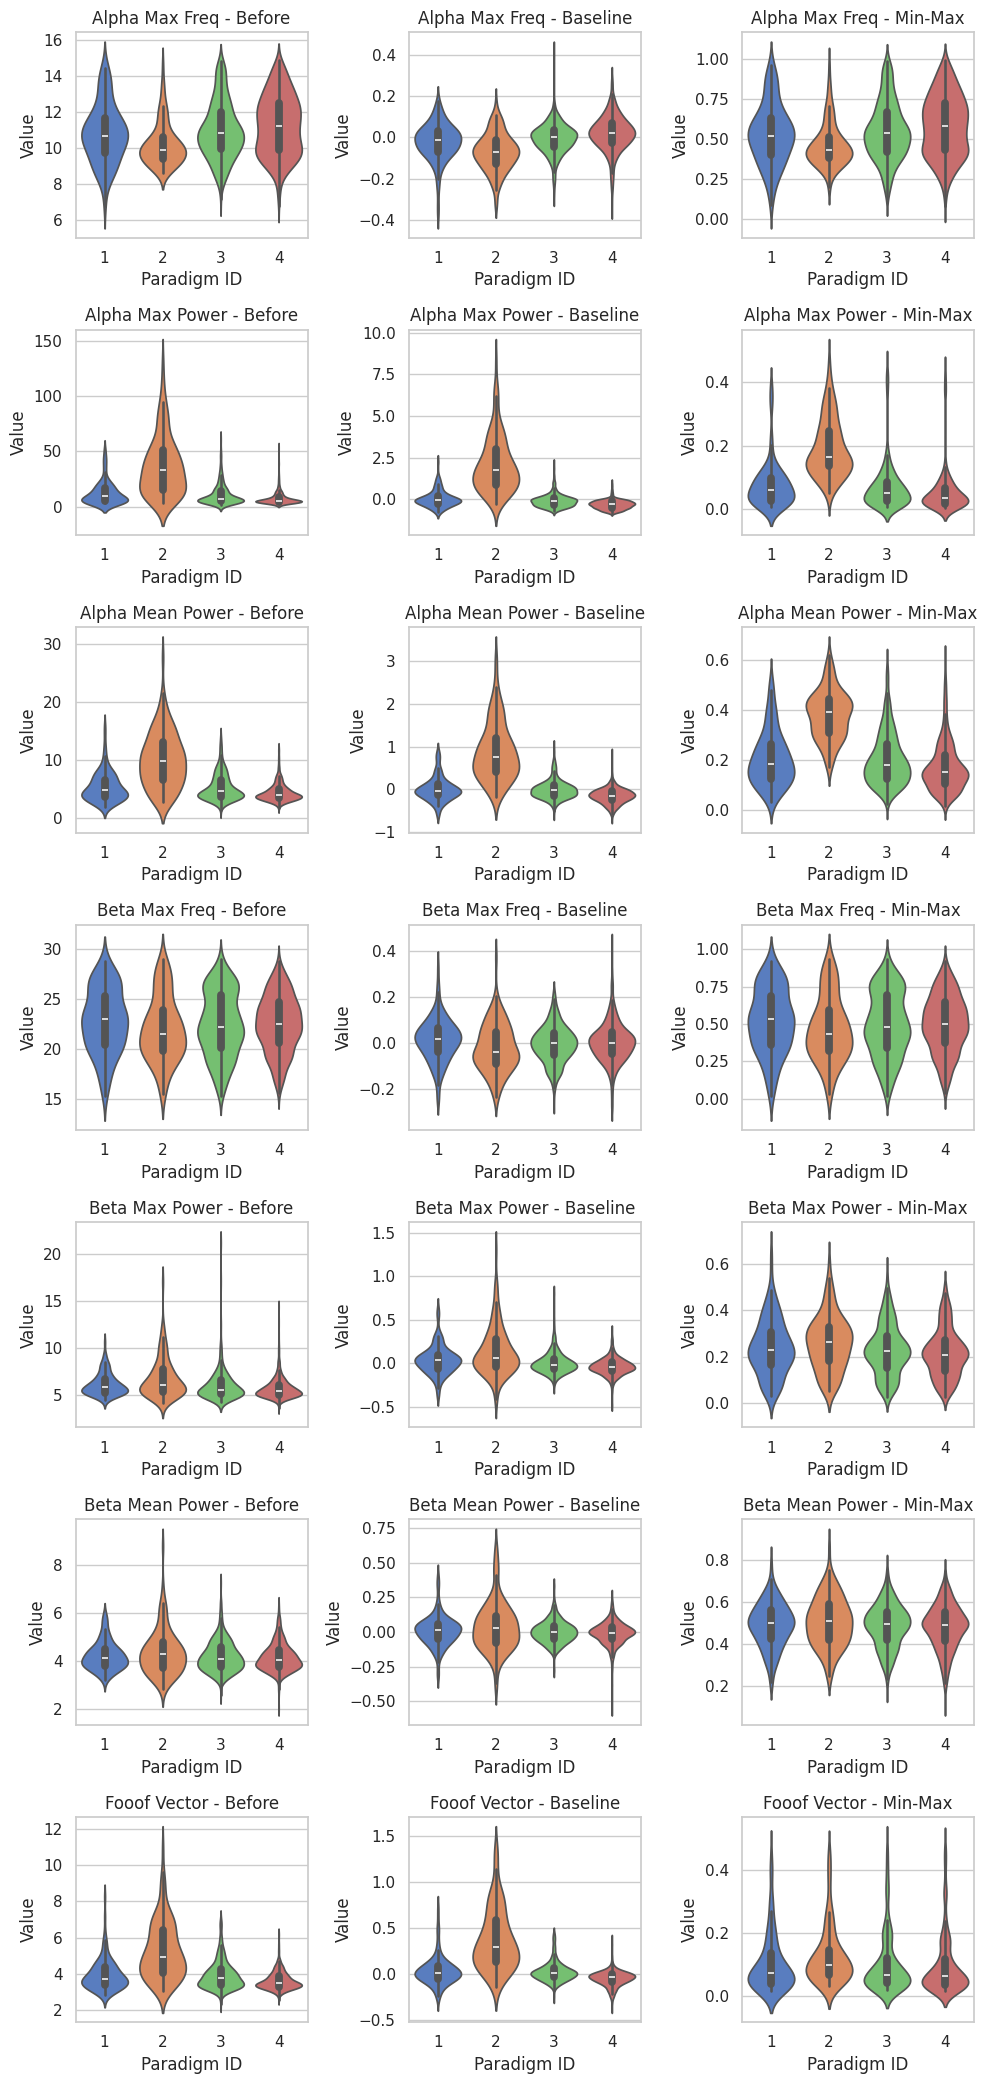

In [8]:
# @title Comparison of Normalization Methods - Visualization

# Compute the mean across electrodes for each feature to reduce matrix to scalar for visualization

# Before normalization
df['alpha_max_freq_mean']   = df['alpha_max_freq'].apply(np.mean)
df['alpha_max_power_mean']  = df['alpha_max_power'].apply(np.mean)
df['alpha_mean_power_mean'] = df['alpha_mean_power'].apply(np.mean)
df['beta_max_freq_mean']    = df['beta_max_freq'].apply(np.mean)
df['beta_max_power_mean']   = df['beta_max_power'].apply(np.mean)
df['beta_mean_power_mean']  = df['beta_mean_power'].apply(np.mean)
df['FOOOF_Vector_mean']  = df['FOOOF_Vector'].apply(np.mean)

# After baseline normalization
df['alpha_max_freq_norm_baseline_mean']   = df['alpha_max_freq_norm_baseline'].apply(np.mean)
df['alpha_max_power_norm_baseline_mean']  = df['alpha_max_power_norm_baseline'].apply(np.mean)
df['alpha_mean_power_norm_baseline_mean'] = df['alpha_mean_power_norm_baseline'].apply(np.mean)
df['beta_max_freq_norm_baseline_mean']    = df['beta_max_freq_norm_baseline'].apply(np.mean)
df['beta_max_power_norm_baseline_mean']   = df['beta_max_power_norm_baseline'].apply(np.mean)
df['beta_mean_power_norm_baseline_mean']  = df['beta_mean_power_norm_baseline'].apply(np.mean)
df['FOOOF_Vector_norm_baseline_mean']  = df['FOOOF_Vector_norm_baseline'].apply(np.mean)

# After min-max normalization
df['alpha_max_freq_norm_min_max_mean']   = df['alpha_max_freq_norm_min_max'].apply(np.mean)
df['alpha_max_power_norm_min_max_mean']  = df['alpha_max_power_norm_min_max'].apply(np.mean)
df['alpha_mean_power_norm_min_max_mean'] = df['alpha_mean_power_norm_min_max'].apply(np.mean)
df['beta_max_freq_norm_min_max_mean']    = df['beta_max_freq_norm_min_max'].apply(np.mean)
df['beta_max_power_norm_min_max_mean']   = df['beta_max_power_norm_min_max'].apply(np.mean)
df['beta_mean_power_norm_min_max_mean']  = df['beta_mean_power_norm_min_max'].apply(np.mean)
df['FOOOF_Vector_norm_min_max_mean']  = df['FOOOF_Vector_norm_min_max'].apply(np.mean)

# Define normalization types for looping
norm_types = {
    "Before": "_mean",
    "Baseline": "_norm_baseline_mean",
    "Min-Max": "_norm_min_max_mean",
}

# Create Violin Plots
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(features_list), ncols=3, figsize=(10, len(features_list) * 3))

for i, feature in enumerate(features_list):
    for j, (norm_label, suffix) in enumerate(norm_types.items()):
        if f"{feature}{suffix}" in df.columns:
            plot_df = df[['paradigm_id', f"{feature}{suffix}"]].copy()
            plot_df.rename(columns={f"{feature}{suffix}": "Value"}, inplace=True)
            sns.violinplot(x="paradigm_id", y="Value", hue="paradigm_id", data=plot_df, inner="box", palette="muted", ax=axes[i, j], legend=False)
            axes[i, j].set_title(f"{feature.replace('_', ' ').title()} - {norm_label}")
            axes[i, j].set_xlabel("Paradigm ID")
            axes[i, j].set_ylabel("Value")

plt.tight_layout()
plt.show()

### Comparison of Normalization Methods

The figure above presents the distribution of each EEG feature (rows) across the four experimental paradigms, under three normalization schemes:  **Before normalization**, **Baseline normalization**, and **Min-Max normalization** (columns).

Each violin plot shows the average feature value per trial (averaged across electrodes), allowing visual comparison of: Overall spread (variance), Presence of outliers and Between-paradigm differences.

**Baseline normalization** was selected for further analysis as it maintains clear differences between paradigms while reducing inter-subject variability.  This is reflected in the more compact and symmetric distributions, with fewer extreme values, compared to the raw or min-max normalized versions.

# **Step 1: Basic Binary Classifier – High vs. Low Cognitive Demand, based on Alpha-Beta Features**

In [9]:
# @title Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, balanced_accuracy_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [10]:
# @title Prepare Input for Binary Cognitive Demand Classifier

# Map Paradigms to Demand Levels
# Based on experimental design:
# Paradigms 1 & 2 (Resting State) → Low Demand
# Paradigms 3 & 4 (Oddball, Lecture) → High Demand
demand_mapping = {1: 'Low', 2: 'Low', 3: 'High', 4: 'High'}
df['demand_level'] = df['paradigm_id'].map(demand_mapping)

# Prepare the base columns
participant_ids = df['part_id'].values
demand_levels = df['demand_level'].map({'High': 1, 'Low': 0}).values

# Collect all flattened features into a list
flattened_features = []

for feature in ['alpha_max_freq_norm_baseline', 'alpha_max_power_norm_baseline', 'alpha_mean_power_norm_baseline',
                'beta_max_freq_norm_baseline', 'beta_max_power_norm_baseline', 'beta_mean_power_norm_baseline']:
    matrix = np.vstack(df[feature])  # shape: [n_trials, n_electrodes]
    # Create a DataFrame for this feature
    feature_df = pd.DataFrame(matrix, columns=[f'{feature}_electrode_{i+1}' for i in range(matrix.shape[1])])
    flattened_features.append(feature_df)

# Concatenate all feature DataFrames at once (efficient and avoids fragmentation)
df_model = pd.concat(flattened_features, axis=1)
df_model['participant_id'] = participant_ids
df_model['demand_level'] = demand_levels

# Standardize the feature values
features_only = df_model.drop(columns=['participant_id', 'demand_level'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_only)

# Create the final DataFrame
df_model_scaled = pd.DataFrame(scaled_features, columns=features_only.columns)
df_model_scaled['participant_id'] = df_model['participant_id'].values
df_model_scaled['demand_level'] = df_model['demand_level'].values

# Final model input
df_model = df_model_scaled
df_model

,alpha_max_freq_norm_baseline_electrode_1,alpha_max_freq_norm_baseline_electrode_2,alpha_max_freq_norm_baseline_electrode_3,alpha_max_freq_norm_baseline_electrode_4,alpha_max_freq_norm_baseline_electrode_5,alpha_max_freq_norm_baseline_electrode_6,alpha_max_freq_norm_baseline_electrode_7,alpha_max_freq_norm_baseline_electrode_8,alpha_max_freq_norm_baseline_electrode_9,alpha_max_freq_norm_baseline_electrode_10,...,beta_mean_power_norm_baseline_electrode_57,beta_mean_power_norm_baseline_electrode_58,beta_mean_power_norm_baseline_electrode_59,beta_mean_power_norm_baseline_electrode_60,beta_mean_power_norm_baseline_electrode_61,beta_mean_power_norm_baseline_electrode_62,beta_mean_power_norm_baseline_electrode_63,beta_mean_power_norm_baseline_electrode_64,participant_id,demand_level
0,-0.218799,0.134761,-0.265225,-0.596088,-0.421909,-0.376466,-0.254982,-0.457906,-0.414411,-0.493453,...,-1.766313,-2.849454,-3.061442,-2.493841,-1.704785,-2.081524,-2.107167,-2.202158,501,0
1,-0.239665,0.115247,-0.503576,-0.655785,-0.087032,0.015377,-0.365664,-0.528378,-0.660144,-0.700340,...,-2.128976,-1.616434,-2.380143,-1.840929,-1.601472,-2.027678,-2.367069,-2.069381,501,0
2,0.334152,0.349413,0.245527,0.144160,0.225520,0.283480,0.298428,0.196474,0.230637,-0.010718,...,-2.070339,-1.639847,-2.366647,-2.544777,-1.697332,-1.747103,-1.515030,-2.159097,501,0
3,0.501081,-0.850685,0.415777,-1.288578,0.415284,-0.015558,0.036816,0.347484,0.312548,0.276625,...,-1.512333,-1.780373,-1.707675,-2.207102,-1.698052,-1.575621,-1.319769,-0.788424,501,0
4,1.411896,1.518891,2.377798,1.679603,0.251385,2.189740,1.710356,-0.252580,-0.120190,0.105561,...,0.826016,-0.451136,1.385282,2.783716,3.274600,2.797507,0.877327,1.735326,501,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,3.069597,0.203881,1.882732,1.902612,-0.048249,-1.217076,0.000490,-0.552076,2.853738,2.696216,...,0.000472,-0.023773,0.783796,-0.238609,0.682645,0.410662,0.239213,0.757669,563,1
1379,0.602911,0.129467,1.657665,1.016296,-0.059601,0.555052,0.087463,-0.055555,0.131015,0.691724,...,0.256803,0.006504,0.584926,0.461553,1.472939,0.915095,0.343215,1.397240,563,1
1380,0.162621,0.253490,0.191843,0.166405,0.150398,-0.378199,-0.214384,-0.076030,0.047719,0.469652,...,-0.187699,-0.295165,-0.324056,-0.071664,-0.078285,-0.418084,-0.667890,0.098231,563,1
1381,0.083051,0.089780,-0.004370,-0.046068,-0.031223,-0.074106,-0.086483,0.041702,-0.134490,-0.015400,...,-0.203388,-0.480576,0.075879,0.524624,0.233079,-0.004451,-0.281134,0.543847,563,1


### Standardization
All features were standardized (zero mean and unit variance) using `StandardScaler`.  
This step is essential because both the PCA and many machine learning models (e.g., logistic regression, SVM) are sensitive to the scale of input variables.  
Without standardization, features with larger numerical ranges could disproportionately influence the principal components or model coefficients, leading to biased results and suboptimal performance.

The standardized dataset was then used for both the PCA visualization and subsequent classification modeling.

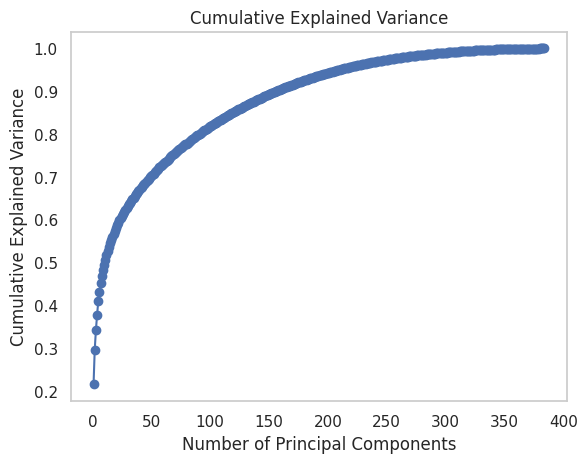

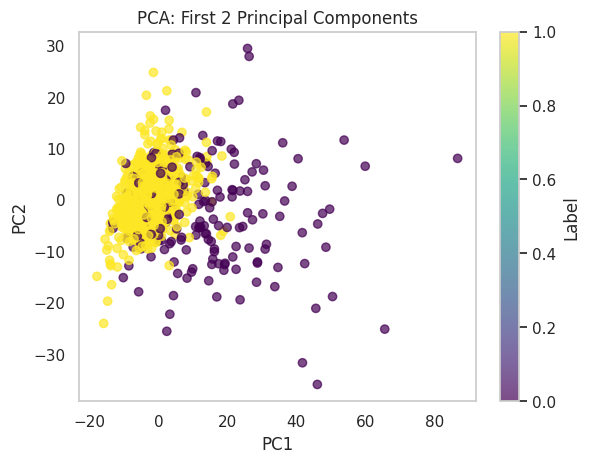

In [11]:
# @title PCA Exploration Before Modeling
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

for_pca_df = df_model.drop(columns=['participant_id', 'demand_level'])
df_labels = df_model['demand_level']

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(for_pca_df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Convert principal components to a DataFrame for easier plotting
principal_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Plot the first 2 principal components
plt.figure()
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=df_labels, cmap='viridis', alpha=0.7)
plt.title('PCA: First 2 Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Label')
plt.grid()
plt.show()

# Interactive 3D plot of the first 3 principal components
fig = px.scatter_3d(
    principal_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color=df_labels,
    title='PCA: First 3 Principal Components',
    labels={'color': 'Label'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)
fig.update_traces(marker=dict(size=5, opacity=0.8))
fig.show()


### PCA Exploration Before Modeling

Before training the classifier, we explored the data using **Principal Component Analysis (PCA)** to assess structure and potential separability between cognitive demand levels.

- **Class Mapping**: Paradigms were grouped into binary labels — *High Demand (1)* and *Low Demand (0)* — based on their cognitive requirements.
- **Dimensionality Reduction**: PCA was applied to the standardized features to capture the most informative directions of variance.
- **Variance Analysis**: The cumulative explained variance plot indicates how many principal components are required to retain most of the variance in the data.
- **2D and 3D Visualization**:
  - The **2D scatter plot** (PC1 vs. PC2) shows some clustering between the two demand levels, although with noticeable overlap.
  - The **3D PCA plot** (PC1–PC3) provides better separation and insight into the structure of the data, although the classes are still not linearly separable.

> This step helps evaluate whether linear models are likely to perform well, and provides an intuition about the complexity of the classification task.


Class distribution:
demand_level
1    1151
0     232
Name: count, dtype: int64


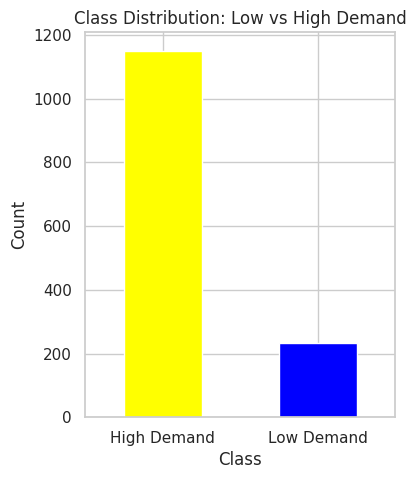

In [12]:
# @title Understand the Data
# Count the number of samples in each class
class_counts = df_model['demand_level'].value_counts()
print("Class distribution:")
print(class_counts)

# Visualize the distribution
plt.figure(figsize = [4,5])
class_counts.plot(kind='bar', color=[ 'yellow','blue'])
plt.title("Class Distribution: Low vs High Demand")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["High Demand","Low Demand"], rotation=0)
plt.show()

### Class Distribution
The bar plot above shows an **imbalance** in the number of trials per class, with more samples in the high-demand condition.

As a first step, we used the dataset in its original, imbalanced form to evaluate baseline model performance.  
This allowed us to assess how well the model could distinguish between high and low cognitive demand conditions without any balancing techniques applied.

Next, we evaluated the model's performance after applying SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.  
This allowed us to examine whether artificially balancing the class distribution would improve classification performance.

**In the following code section, you can select which version of the dataset to use — the original imbalanced version or the SMOTE-balanced one.**



In [13]:
# @title Choose dataset type: original or SMOTE-balanced

# -----------------------------
# Split Data Based on Participants
# -----------------------------
# Extract unique participant IDs
participants = df_model['participant_id'].unique()

# Randomly split participants into training and test sets (stratified by subject)
train_participants, test_participants = train_test_split(
    participants, test_size=0.3, random_state=42
)

# -----------------------------
# Ask whether to apply SMOTE (only on train)
# -----------------------------
choice = input("Use SMOTE to balance the training data? (y/n): ").strip().lower()
use_smote = True if choice == 'y' else False

# -----------------------------
# Create train/test sets
# -----------------------------
train_mask = df_model['participant_id'].isin(train_participants)
test_mask = df_model['participant_id'].isin(test_participants)

X_train = df_model[train_mask].drop(columns=['demand_level', 'participant_id'])
y_train = df_model[train_mask]['demand_level']
X_test = df_model[test_mask].drop(columns=['demand_level', 'participant_id'])
y_test = df_model[test_mask]['demand_level']

# -----------------------------
# Apply SMOTE if requested
# -----------------------------
if use_smote:
    print("Applying SMOTE on training set only...")
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print(f"New class distribution in training set:\n{pd.Series(y_train).value_counts()}")
else:
    print("Using original (imbalanced) training data")


Use SMOTE to balance the training data? (y/n): y
Applying SMOTE on training set only...
New class distribution in training set:
demand_level
0    791
1    791
Name: count, dtype: int64


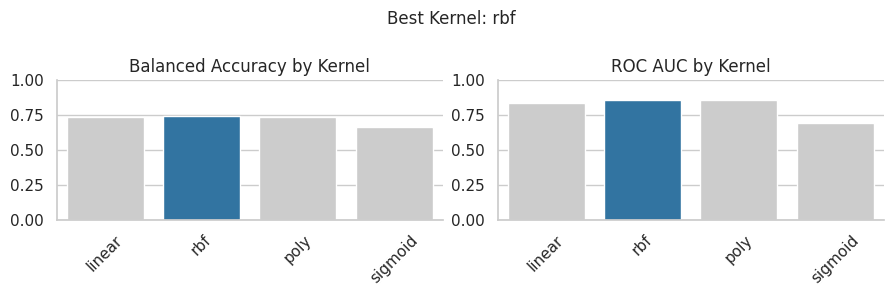

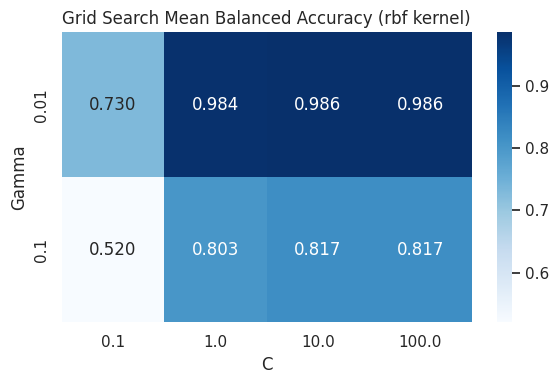

Best Parameters:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Balanced Accuracy: 0.50
ROC AUC: 0.85

Classification Report:
              precision  recall  f1-score  support
0                  0.25    0.01      0.03    72.00
1                  0.83    0.99      0.91   360.00
accuracy           0.83    0.83      0.83     0.83
macro avg          0.54    0.50      0.47   432.00
weighted avg       0.74    0.83      0.76   432.00


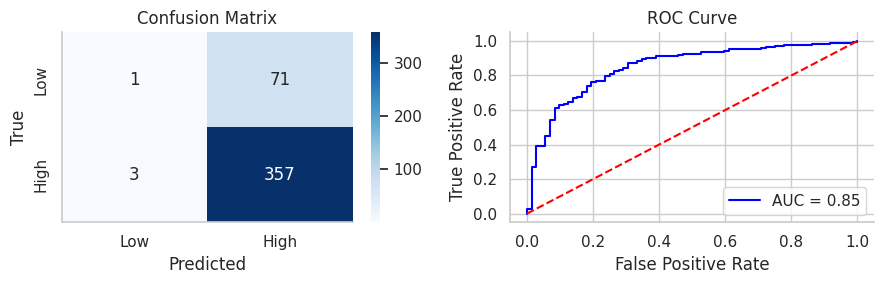

In [68]:
# @title Compare Different SVM Kernels - This part takes time :-) (~15m)
# -----------------------------
# Compare SVM Kernels
# -----------------------------
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV

# Define kernels to test
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
kernel_results = []

# Evaluate each kernel
for kernel in kernels:
    svm = SVC(kernel=kernel, probability=True, random_state=42)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    y_prob = svm.predict_proba(X_test)[:, 1]

    kernel_results.append({
        'Kernel': kernel,
        'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    })

# Create DataFrame
results_df = pd.DataFrame(kernel_results)

# Identify best kernel based on Balanced Accuracy
best_kernel = results_df.loc[results_df['Balanced Accuracy'].idxmax(), 'Kernel']

# Plot with highlight on best kernel
fig, axes = plt.subplots(1, 2, figsize=(9, 3))
palette = ['#cccccc' if k != best_kernel else '#1f77b4' for k in results_df['Kernel']]

sns.barplot(data=results_df, x='Kernel', y='Balanced Accuracy', hue='Kernel',
            palette=palette, ax=axes[0], legend=False)
axes[0].set_title("Balanced Accuracy by Kernel")
axes[0].set_ylim(0, 1)

sns.barplot(data=results_df, x='Kernel', y='ROC AUC', hue='Kernel',
            palette=palette, ax=axes[1], legend=False)
axes[1].set_title("ROC AUC by Kernel")
axes[1].set_ylim(0, 1)

for ax in axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', labelrotation=45)
    sns.despine(ax=ax)

plt.suptitle(f"Best Kernel: {best_kernel}", fontsize=12)
plt.tight_layout()
plt.show()

# -----------------------------
# Hyperparameter Tuning for Best Kernel
# -----------------------------
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01],
    'kernel': [best_kernel]
}

grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='balanced_accuracy', verbose=0)
grid.fit(X_train, y_train)

# Convert GridSearchCV results to a DataFrame
grid_results_df = pd.DataFrame(grid.cv_results_)
# Create separate columns for C and gamma
grid_results_df['C'] = grid_results_df['params'].apply(lambda x: x['C'])
grid_results_df['gamma'] = grid_results_df['params'].apply(lambda x: x['gamma'])
# Plot heatmap of mean scores
pivot_table = grid_results_df.pivot(index='gamma', columns='C', values='mean_test_score')
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap='Blues')
plt.title(f'Grid Search Mean Balanced Accuracy ({best_kernel} kernel)')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.tight_layout()
plt.show()


best_model = grid.best_estimator_
best_params = grid.best_params_

print("Best Parameters:")
print(best_params)

# -----------------------------
# Evaluate and Visualize Best Model
# -----------------------------
# Predict
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

# Metrics
balanced_acc = balanced_accuracy_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_prob_best)
print(f"Balanced Accuracy: {balanced_acc:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Classification Report
print("\nClassification Report:")
report_df = pd.DataFrame(classification_report(y_test, y_pred_best, output_dict=True)).T.round(2)
print(report_df)

# Visuals
cm = confusion_matrix(y_test, y_pred_best)
fpr, tpr, _ = roc_curve(y_test, y_prob_best)

fig, axes = plt.subplots(1, 2, figsize=(9, 3))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
# ROC Curve
axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='red')
axes[1].set_title('ROC Curve')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

for ax in axes:
    sns.despine(ax=ax)

plt.tight_layout()
plt.show()

In [69]:
# @title Change train process - Leave-One-Participant-Out (LOPO) rather then Train/Test split (70-30)
# Use the Best model found in the previous section.

# -----------------------------
# LOPO Evaluation Using Best Model from Train/Test
# -----------------------------
print("\nEvaluating Best Model on LOPO Cross-Validation")

from sklearn.model_selection import LeaveOneGroupOut
X_lopo = df_model.drop(columns=['participant_id', 'demand_level'])
y_lopo = df_model['demand_level']
groups_lopo = df_model['participant_id']

logo = LeaveOneGroupOut()
all_preds, all_probs, all_true = [], [], []

for train_idx, test_idx in logo.split(X_lopo, y_lopo, groups=groups_lopo):
    X_train_lopo, X_test_lopo = X_lopo.iloc[train_idx], X_lopo.iloc[test_idx]
    y_train_lopo, y_test_lopo = y_lopo.iloc[train_idx], y_lopo.iloc[test_idx]

    if use_smote:
        smote = SMOTE(random_state=42)
        X_train_lopo, y_train_lopo = smote.fit_resample(X_train_lopo, y_train_lopo)

    model = SVC(
        kernel=best_params['kernel'],
        C=best_params['C'],
        gamma=best_params['gamma'],
        probability=True,
        random_state=42
    )
    model.fit(X_train_lopo, y_train_lopo)

    y_pred_lopo = model.predict(X_test_lopo)
    y_prob_lopo = model.predict_proba(X_test_lopo)[:, 1]

    all_preds.extend(y_pred_lopo)
    all_probs.extend(y_prob_lopo)
    all_true.extend(y_test_lopo)

# -----------------------------
# Evaluation Summary
# -----------------------------
print("\n=== LOPO Evaluation with Best Model from Train/Test ===")
print(f"Balanced Accuracy: {balanced_accuracy_score(all_true, all_preds):.2f}")
print(f"ROC AUC: {roc_auc_score(all_true, all_probs):.2f}")
print("Classification Report:")
print(pd.DataFrame(classification_report(all_true, all_preds, output_dict=True)).T.round(2))


Evaluating Best Model on LOPO Cross-Validation

=== LOPO Evaluation with Best Model from Train/Test ===
Balanced Accuracy: 0.52
ROC AUC: 0.84
Classification Report:
              precision  recall  f1-score  support
0                  0.56    0.04      0.07   232.00
1                  0.84    0.99      0.91  1151.00
accuracy           0.83    0.83      0.83     0.83
macro avg          0.70    0.52      0.49  1383.00
weighted avg       0.79    0.83      0.77  1383.00


In [ ]:
# @title Random Forest with Hyperparameters tuning
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='balanced_accuracy', cv=5, verbose=1, return_train_score=True)
grid_search_rf.fit(X_train, y_train)  # Train the model with grid search

# Extract best parameters and best model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Predict on the test set using the best model
y_pred_rf = best_model_rf.predict(X_test)
y_pred_prob_rf = best_model_rf.predict_proba(X_test)[:, 1]


# Print best parameters
print("Best Parameters for Random Forest:")
print(best_params_rf)

# Print classification metrics
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print("\nClassification Report for Random Forest:")
print(f"Balanced Accuracy: {balanced_acc_rf:.2f}")
print(f"ROC-AUC Score: {roc_auc_rf:.2f}")

# Classification Report
print("\nClassification Report:")
report_df = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).T.round(2)
print(report_df)

# Visuals
cm = confusion_matrix(y_test, y_pred_rf)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)

fig, axes = plt.subplots(1, 2, figsize=(9, 3))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
# ROC Curve
axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='red')
axes[1].set_title('ROC Curve')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

for ax in axes:
    sns.despine(ax=ax)

plt.tight_layout()
plt.show()

Number of features with importance above uniform baseline: 103


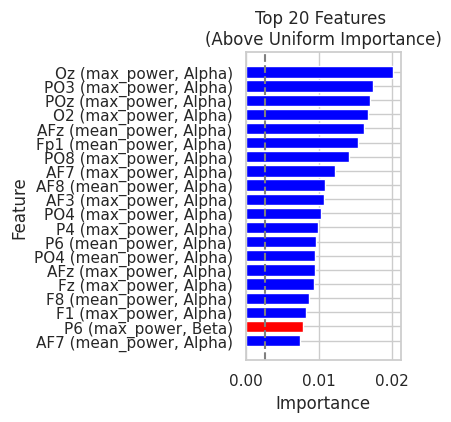


Among the top 20 features (above uniform importance), 19 were from the Alpha band and 1 from the Beta band.
Alpha electrodes included: AF7 (2), AFz (2), PO4 (2), Oz (1), O2 (1), POz (1), Fp1 (1), PO3 (1), PO8 (1), AF8 (1), AF3 (1), P4 (1), P6 (1), Fz (1), F8 (1), F1 (1).
Beta electrodes included: P6 (1).
Overall, there were 7 mean power and 13 max power features.
In Alpha: 7 mean, 12 max. In Beta: 0 mean, 1 max.


In [72]:
# @title Extract feature importances from the Random Forest model
feature_importances = best_model_rf.feature_importances_

# Assuming X_train_scaled is a DataFrame, get the feature names
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f'{df_model.columns[i]}' for i in range(X_train.shape[1])]

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Electrode names for selected 15 electrodes (Alpha & Beta)
alpha_elec_15 = ['P1','P2','P4','PO3','PO4','POz','Pz']
beta_elec_15 = ['C2', 'Cz', 'F1', 'F2', 'FC1', 'FC2', 'FCz', 'Fz']

# Full list of 64 electrode names in Biosemi order
electrode_64 = [
    'Fp1','AF7','AF3','F1','F3','F5','F7','FT7','FC5','FC3','FC1',
    'C1','C3','C5','T7','TP7','CP5','CP3','CP1','P1','P3','P5','P7',
    'P9','PO7','PO3','O1','Iz','Oz','POz','Pz','CPz','Fpz','Fp2',
    'AF8','AF4','AFz','Fz','F2','F4','F6','F8','FT8','FC6','FC4',
    'FC2','FCz','Cz','C2','C4','C6','T8','TP8','CP6','CP4','CP2',
    'P2','P4','P6','P8','P10','PO8','PO4','O2'
]
# Mapping for full dataset
alpha_elec_64 = electrode_64
beta_elec_64 = electrode_64

# Flag: Set True if working with full 15 electrodes dataset
use_15_electrodes = True if int(dataset_choice) == 1 else False

# Use the correct set
if use_15_electrodes:
    alpha_names = alpha_elec_15
    beta_names = beta_elec_15
else:
    alpha_names = alpha_elec_64
    beta_names = beta_elec_64

# Helper function to map electrode number to name
def map_electrode_name(row):
    idx = int(row['Electrode']) - 1  # because electrode_1 is index 0
    if row['Band'] == 'Alpha' and idx < len(alpha_names):
        return alpha_names[idx]
    elif row['Band'] == 'Beta' and idx < len(beta_names):
        return beta_names[idx]
    else:
        return f"Electrode {row['Electrode']}"

# Step 1: Compute uniform importance threshold
uniform_importance = 1 / len(importance_df)

# Step 2: Filter features above threshold
above_uniform_df = importance_df[importance_df['Importance'] > uniform_importance].copy()
print(f"Number of features with importance above uniform baseline: {len(above_uniform_df)}")

# Step 3: Extract details
above_uniform_df['Band'] = above_uniform_df['Feature'].apply(lambda x: 'Alpha' if 'alpha' in x else 'Beta')
above_uniform_df['Feature_Type'] = above_uniform_df['Feature'].apply(
    lambda x: 'max_power' if 'max_power' in x else
              'mean_power' if 'mean_power' in x else
              'max_freq' if 'max_freq' in x else 'other')
above_uniform_df['Electrode'] = above_uniform_df['Feature'].str.extract(r'electrode_(\d+)').astype(int)
above_uniform_df['Electrode_Name'] = above_uniform_df.apply(map_electrode_name, axis=1)

# Step 4: Get top 20
top_features = above_uniform_df.sort_values(by='Importance', ascending=False).head(20).copy()

# Step 5: Plot
colors = ['blue' if band == 'Alpha' else 'red' for band in top_features['Band']]

plt.figure(figsize=(2, 4))
labels = top_features['Electrode_Name'] + ' (' + top_features['Feature_Type'] + ', ' + top_features['Band'] + ')'
plt.barh(labels, top_features['Importance'], color=colors)
plt.axvline(uniform_importance, color='gray', linestyle='--', label='Uniform Importance Threshold')
plt.gca().invert_yaxis()
plt.title(f'Top {len(colors)} Features \n(Above Uniform Importance)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Step 6: Print summary per band
alpha_contributors = top_features[top_features['Band'] == 'Alpha']['Electrode_Name'].value_counts()
beta_contributors = top_features[top_features['Band'] == 'Beta']['Electrode_Name'].value_counts()

# Step 7: Cross-tab of Feature Type by Band
feature_summary = top_features.groupby(['Band', 'Feature_Type']).size().unstack(fill_value=0)

# Summary stats
n_alpha = top_features[top_features['Band'] == 'Alpha'].shape[0]
n_beta = top_features[top_features['Band'] == 'Beta'].shape[0]

alpha_counts = top_features[top_features['Band'] == 'Alpha']['Electrode_Name'].value_counts()
beta_counts = top_features[top_features['Band'] == 'Beta']['Electrode_Name'].value_counts()

alpha_electrodes = [f"{name} ({count})" for name, count in alpha_counts.items()]
beta_electrodes = [f"{name} ({count})" for name, count in beta_counts.items()]

feature_counts = top_features['Feature_Type'].value_counts()
by_band = top_features.groupby(['Band', 'Feature_Type']).size().unstack(fill_value=0)

# Construct summary sentence with fallback defaults
alpha_mean = by_band.loc['Alpha', 'mean_power'] if 'Alpha' in by_band.index and 'mean_power' in by_band.columns else 0
alpha_max = by_band.loc['Alpha', 'max_power'] if 'Alpha' in by_band.index and 'max_power' in by_band.columns else 0
beta_mean = by_band.loc['Beta', 'mean_power'] if 'Beta' in by_band.index and 'mean_power' in by_band.columns else 0
beta_max = by_band.loc['Beta', 'max_power'] if 'Beta' in by_band.index and 'max_power' in by_band.columns else 0

# Compose summary
summary = (
    f"Among the top {len(top_features)} features (above uniform importance), "
    f"{n_alpha} were from the Alpha band and {n_beta} from the Beta band.\n"
    f"Alpha electrodes included: {', '.join(alpha_electrodes) if alpha_electrodes else 'None'}.\n"
    f"Beta electrodes included: {', '.join(beta_electrodes) if beta_electrodes else 'None'}.\n"
    f"Overall, there were {feature_counts.get('mean_power', 0)} mean power and "
    f"{feature_counts.get('max_power', 0)} max power features.\n"
    f"In Alpha: {alpha_mean} mean, {alpha_max} max. In Beta: {beta_mean} mean, {beta_max} max."
)

print("\n" + summary)

# **Step 2: Basic Binary Classifier – High vs. Low Cognitive Demand, based on FOOOF Vector**

In [125]:
# @title Prepare Input for Binary Cognitive Demand Classifier (Optimized)

from scipy.interpolate import interp1d

def resample_fooof_vector(fooof_vector, target_length=1000):
    """Interpolates the FOOOF vector to a fixed length."""
    original_length = len(fooof_vector)
    original_x = np.linspace(2, 40, original_length)  # Original frequency range
    target_x = np.linspace(2, 40, target_length)  # New standardized range
    interpolator = interp1d(original_x, fooof_vector, kind='linear', fill_value="extrapolate")
    return interpolator(target_x)

# Resample and normalize FOOOF vectors
df["FOOOF_Vector_Resampled_norm"] = df["FOOOF_Vector_norm_baseline"].apply(lambda x: resample_fooof_vector(np.array(x[0])))

# Convert all resampled vectors into a single matrix
feature_matrix = np.vstack(df["FOOOF_Vector_Resampled_norm"])

# Create DataFrame for features
fooof_features_df = pd.DataFrame(feature_matrix, columns=[f'fooof_bin_{i+1}' for i in range(feature_matrix.shape[1])])

# Merge metadata with feature matrix
fooof_df = pd.concat([
    df[['part_id']].reset_index(drop=True),
    df_model[['demand_level']].reset_index(drop=True),
    fooof_features_df.reset_index(drop=True)
], axis=1)

fooof_df = fooof_df.rename(columns={"part_id": "participant_id"})
df_model = fooof_df
df_model

,participant_id,demand_level,fooof_bin_1,fooof_bin_2,fooof_bin_3,fooof_bin_4,fooof_bin_5,fooof_bin_6,fooof_bin_7,fooof_bin_8,...,fooof_bin_991,fooof_bin_992,fooof_bin_993,fooof_bin_994,fooof_bin_995,fooof_bin_996,fooof_bin_997,fooof_bin_998,fooof_bin_999,fooof_bin_1000
0,501,0,-0.781834,-0.781044,-0.780232,-0.779391,-0.778526,-0.777631,-0.776709,-0.775756,...,-0.785744,-0.786084,-0.786419,-0.786750,-0.787075,-0.787396,-0.787712,-0.788024,-0.788331,-0.788634
1,501,0,-0.786620,-0.786090,-0.785542,-0.784974,-0.784387,-0.783776,-0.783146,-0.782491,...,-0.782590,-0.782963,-0.783331,-0.783694,-0.784052,-0.784406,-0.784754,-0.785098,-0.785438,-0.785773
2,501,0,-0.786479,-0.786024,-0.785559,-0.785081,-0.784592,-0.784089,-0.783574,-0.783045,...,-0.780271,-0.780743,-0.781206,-0.781661,-0.782108,-0.782547,-0.782978,-0.783401,-0.783816,-0.784225
3,501,0,-0.787843,-0.787400,-0.786946,-0.786479,-0.786000,-0.785506,-0.785000,-0.784479,...,-0.797958,-0.798114,-0.798269,-0.798421,-0.798571,-0.798718,-0.798864,-0.799008,-0.799149,-0.799288
4,501,1,-0.794621,-0.794337,-0.794046,-0.793749,-0.793445,-0.793134,-0.792816,-0.792491,...,-0.798236,-0.798405,-0.798572,-0.798736,-0.798898,-0.799056,-0.799212,-0.799366,-0.799517,-0.799666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,563,1,-0.654461,-0.652800,-0.651015,-0.649074,-0.646937,-0.644569,-0.641926,-0.638962,...,-0.641853,-0.643193,-0.644520,-0.645835,-0.647136,-0.648425,-0.649701,-0.650964,-0.652215,-0.653453
1379,563,1,-0.627751,-0.626155,-0.624541,-0.622909,-0.621259,-0.619590,-0.617902,-0.616196,...,-0.696004,-0.696762,-0.697511,-0.698251,-0.698982,-0.699704,-0.700417,-0.701122,-0.701818,-0.702505
1380,563,1,-0.661622,-0.660113,-0.658580,-0.657022,-0.655439,-0.653831,-0.652197,-0.650536,...,-0.633476,-0.634924,-0.636358,-0.637779,-0.639186,-0.640579,-0.641960,-0.643326,-0.644680,-0.646020
1381,563,1,-0.708710,-0.707888,-0.707046,-0.706183,-0.705298,-0.704390,-0.703460,-0.702506,...,-0.667592,-0.668536,-0.669473,-0.670401,-0.671320,-0.672232,-0.673134,-0.674029,-0.674915,-0.675793


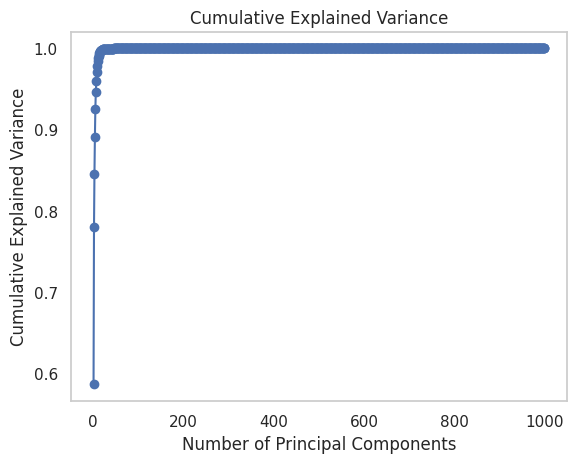

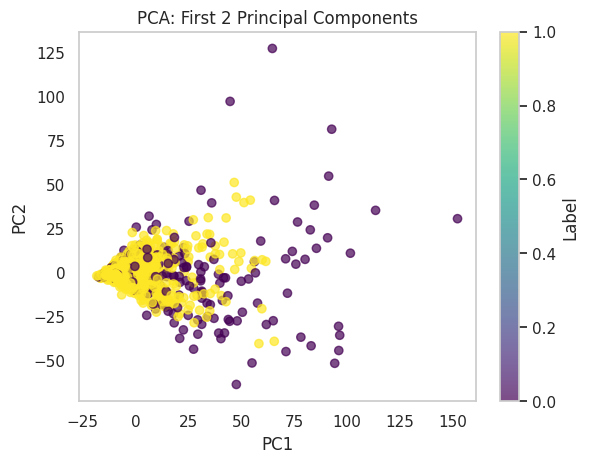

In [126]:
# @title PCA Exploration Before Modeling
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

for_pca_df = df_model.drop(columns=['participant_id', 'demand_level'])
df_labels = df_model['demand_level']

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(for_pca_df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Convert principal components to a DataFrame for easier plotting
principal_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Plot the first 2 principal components
plt.figure()
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=df_labels, cmap='viridis', alpha=0.7)
plt.title('PCA: First 2 Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Label')
plt.grid()
plt.show()

# Interactive 3D plot of the first 3 principal components
fig = px.scatter_3d(
    principal_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color=df_labels,
    title='PCA: First 3 Principal Components',
    labels={'color': 'Label'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)
fig.update_traces(marker=dict(size=5, opacity=0.8))
fig.show()

In [137]:
# @title Choose dataset type: original or SMOTE-balanced

# -----------------------------
# Split Data Based on Participants
# -----------------------------
# Extract unique participant IDs
participants = df_model['participant_id'].unique()

# Randomly split participants into training and test sets (stratified by subject)
train_participants, test_participants = train_test_split(
    participants, test_size=0.3, random_state=42
)

# -----------------------------
# Ask whether to apply SMOTE (only on train)
# -----------------------------
choice = input("Use SMOTE to balance the training data? (y/n): ").strip().lower()
use_smote = True if choice == 'y' else False

# -----------------------------
# Create train/test sets
# -----------------------------
train_mask = df_model['participant_id'].isin(train_participants)
test_mask = df_model['participant_id'].isin(test_participants)

X_train = df_model[train_mask].drop(columns=['demand_level', 'participant_id'])
y_train = df_model[train_mask]['demand_level']
X_test = df_model[test_mask].drop(columns=['demand_level', 'participant_id'])
y_test = df_model[test_mask]['demand_level']

# -----------------------------
# Apply SMOTE if requested
# -----------------------------
if use_smote:
    print("Applying SMOTE on training set only...")
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print(f"New class distribution in training set:\n{pd.Series(y_train).value_counts()}")
else:
    print("Using original (imbalanced) training data")


Use SMOTE to balance the training data? (y/n): y
Applying SMOTE on training set only...
New class distribution in training set:
demand_level
0    791
1    791
Name: count, dtype: int64


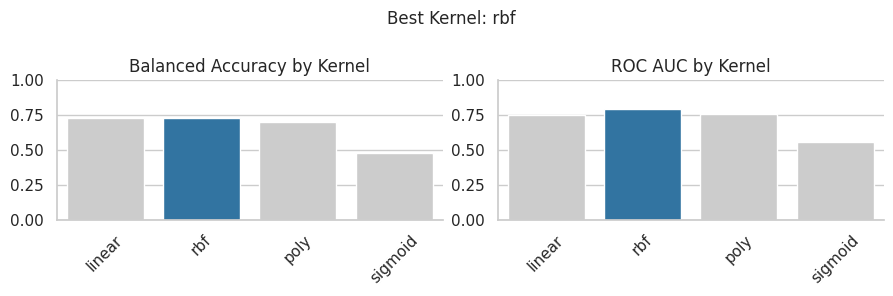

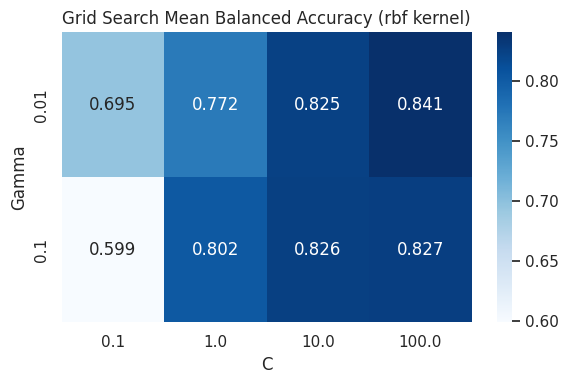

Best Parameters:
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Balanced Accuracy: 0.59
ROC AUC: 0.74

Classification Report:
              precision  recall  f1-score  support
0                  0.31    0.32      0.32    72.00
1                  0.86    0.86      0.86   360.00
accuracy           0.77    0.77      0.77     0.77
macro avg          0.59    0.59      0.59   432.00
weighted avg       0.77    0.77      0.77   432.00


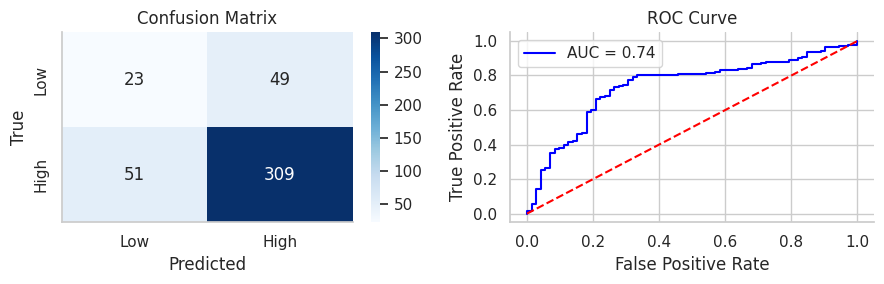

In [138]:
# @title Compare Different SVM Kernels - This part takes time :-) (~15m)
# -----------------------------
# Compare SVM Kernels
# -----------------------------
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV

# Define kernels to test
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
kernel_results = []

# Evaluate each kernel
for kernel in kernels:
    svm = SVC(kernel=kernel, probability=True, random_state=42)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    y_prob = svm.predict_proba(X_test)[:, 1]

    kernel_results.append({
        'Kernel': kernel,
        'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    })

# Create DataFrame
results_df = pd.DataFrame(kernel_results)

# Identify best kernel based on Balanced Accuracy
best_kernel = results_df.loc[results_df['Balanced Accuracy'].idxmax(), 'Kernel']

# Plot with highlight on best kernel
fig, axes = plt.subplots(1, 2, figsize=(9, 3))
palette = ['#cccccc' if k != best_kernel else '#1f77b4' for k in results_df['Kernel']]

sns.barplot(data=results_df, x='Kernel', y='Balanced Accuracy', hue='Kernel',
            palette=palette, ax=axes[0], legend=False)
axes[0].set_title("Balanced Accuracy by Kernel")
axes[0].set_ylim(0, 1)

sns.barplot(data=results_df, x='Kernel', y='ROC AUC', hue='Kernel',
            palette=palette, ax=axes[1], legend=False)
axes[1].set_title("ROC AUC by Kernel")
axes[1].set_ylim(0, 1)

for ax in axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', labelrotation=45)
    sns.despine(ax=ax)

plt.suptitle(f"Best Kernel: {best_kernel}", fontsize=12)
plt.tight_layout()
plt.show()

# -----------------------------
# Hyperparameter Tuning for Best Kernel
# -----------------------------
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01],
    'kernel': [best_kernel]
}

grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='balanced_accuracy', verbose=0)
grid.fit(X_train, y_train)

# Convert GridSearchCV results to a DataFrame
grid_results_df = pd.DataFrame(grid.cv_results_)
# Create separate columns for C and gamma
grid_results_df['C'] = grid_results_df['params'].apply(lambda x: x['C'])
grid_results_df['gamma'] = grid_results_df['params'].apply(lambda x: x['gamma'])
# Plot heatmap of mean scores
pivot_table = grid_results_df.pivot(index='gamma', columns='C', values='mean_test_score')
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap='Blues')
plt.title(f'Grid Search Mean Balanced Accuracy ({best_kernel} kernel)')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.tight_layout()
plt.show()


best_model = grid.best_estimator_
best_params = grid.best_params_

print("Best Parameters:")
print(best_params)

# -----------------------------
# Evaluate and Visualize Best Model
# -----------------------------
# Predict
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

# Metrics
balanced_acc = balanced_accuracy_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_prob_best)
print(f"Balanced Accuracy: {balanced_acc:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Classification Report
print("\nClassification Report:")
report_df = pd.DataFrame(classification_report(y_test, y_pred_best, output_dict=True)).T.round(2)
print(report_df)

# Visuals
cm = confusion_matrix(y_test, y_pred_best)
fpr, tpr, _ = roc_curve(y_test, y_prob_best)

fig, axes = plt.subplots(1, 2, figsize=(9, 3))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
# ROC Curve
axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='red')
axes[1].set_title('ROC Curve')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

for ax in axes:
    sns.despine(ax=ax)

plt.tight_layout()
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report for Random Forest:
Balanced Accuracy: 0.68
ROC-AUC Score: 0.77

Classification Report:
              precision  recall  f1-score  support
0                  0.35    0.57      0.44    72.00
1                  0.90    0.79      0.84   360.00
accuracy           0.75    0.75      0.75     0.75
macro avg          0.63    0.68      0.64   432.00
weighted avg       0.81    0.75      0.78   432.00


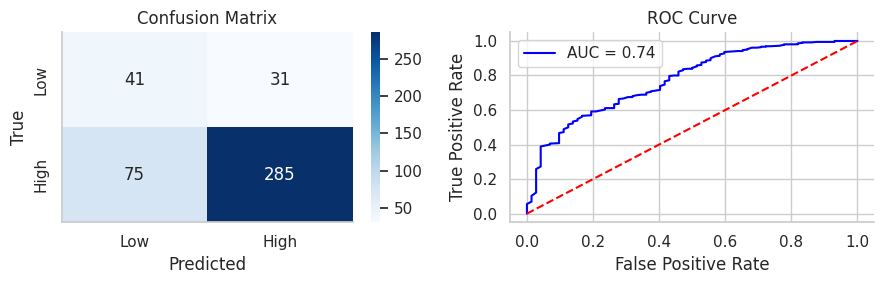

In [139]:
# @title Random Forest with Hyperparameters tuning
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='balanced_accuracy', cv=5, verbose=1, return_train_score=True)
grid_search_rf.fit(X_train, y_train)  # Train the model with grid search

# Extract best parameters and best model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Predict on the test set using the best model
y_pred_rf = best_model_rf.predict(X_test)
y_pred_prob_rf = best_model_rf.predict_proba(X_test)[:, 1]


# Print best parameters
print("Best Parameters for Random Forest:")
print(best_params_rf)

# Print classification metrics
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print("\nClassification Report for Random Forest:")
print(f"Balanced Accuracy: {balanced_acc_rf:.2f}")
print(f"ROC-AUC Score: {roc_auc_rf:.2f}")

# Classification Report
print("\nClassification Report:")
report_df = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).T.round(2)
print(report_df)

# Visuals
cm = confusion_matrix(y_test, y_pred_rf)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)

fig, axes = plt.subplots(1, 2, figsize=(9, 3))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
# ROC Curve
axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='red')
axes[1].set_title('ROC Curve')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

for ax in axes:
    sns.despine(ax=ax)

plt.tight_layout()
plt.show()

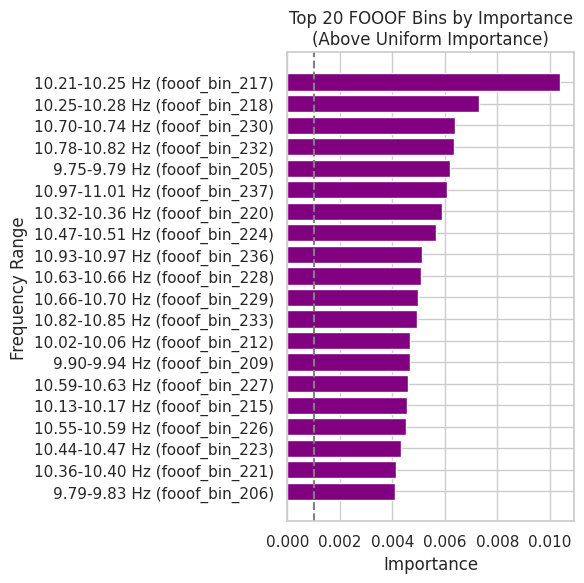

In [140]:
# @title Feature Importance Plot for FOOOF Bins (with Uniform Threshold)

# Extract feature importances
feature_importances = best_model_rf.feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Compute uniform importance threshold
uniform_importance = 1 / len(importance_df)

# Filter only features above uniform importance
importance_df = importance_df[importance_df['Importance'] > uniform_importance].copy()

# Get top N
top_n = 20
top_features = importance_df.head(top_n).copy()

# Add frequency range labels
bin_width = (40 - 2) / 1000

def get_freq_range(bin_name):
    bin_num = int(bin_name.split('_')[-1])
    start = 2 + (bin_num - 1) * bin_width
    end = start + bin_width
    return f"{start:.2f}-{end:.2f} Hz"

top_features['Frequency_Range'] = top_features['Feature'].apply(get_freq_range)
top_features['Label'] = top_features['Frequency_Range'] + " (" + top_features['Feature'] + ")"

# Plot
plt.figure(figsize=(6, 6))
plt.barh(top_features['Label'], top_features['Importance'], color='purple')
plt.axvline(uniform_importance, color='gray', linestyle='--', label='Uniform Importance')
plt.gca().invert_yaxis()
plt.title(f'Top {top_n} FOOOF Bins by Importance\n(Above Uniform Importance)')
plt.xlabel('Importance')
plt.ylabel('Frequency Range')
plt.tight_layout()
plt.show()


# **Step 3: Multi class classifaction**



In [171]:
# @title Load dataset (64 electrodes only!) and Convert into a structured DataFrame

# Determine filename
filename = "data_matrix_64.mat"
data = loadmat(f"{relevant_path}/{filename}")
data_matrix = data['data_matrix'] # Extract the main variable from the .mat file

# Create a list of dictionaries with the correct types for each column
rows = []
for row in data_matrix:
    rows.append({
        'part_id': int(row[0].item()),                # Participant ID as integer
        'paradigm_id': int(row[1].item()),            # Experimental condition ID as integer
        'trial_id': int(row[2].item()),               # Trial number as integer
        'feature_matrix_alpha': np.array(row[3]),     # Alpha band feature matrix (NumPy array)
        'feature_matrix_beta': np.array(row[4]),      # Beta band feature matrix (NumPy array)
        'FOOOF_Vector': np.array(row[5])              # FOOOF-derived features (NumPy array)
    })

# Convert the list of dictionaries into a Pandas DataFrame
df = pd.DataFrame(rows)

# Feature Extraction and Normalization
# Extract each frequency feature from alpha and beta matrices
df['alpha_max_power']  = df['feature_matrix_alpha'].apply(lambda x: np.array(x)[:, 1])
df['alpha_mean_power'] = df['feature_matrix_alpha'].apply(lambda x: np.array(x)[:, 2])
df['beta_max_power']   = df['feature_matrix_beta'].apply(lambda x: np.array(x)[:, 1])
df['beta_mean_power']  = df['feature_matrix_beta'].apply(lambda x: np.array(x)[:, 2])

features_list = ['alpha_max_power', 'alpha_mean_power', 'beta_max_power', 'beta_mean_power']
# Baseline Normalization
# Compute mean baseline for each feature per participant
baselines = df.groupby('part_id').apply(
    lambda x: {
        feature: np.mean(np.hstack(x[feature]))
        for feature in features_list
    },
    include_groups=False
)
# Apply baseline normalization
for feature in features_list:
    df[f'{feature}_norm_baseline'] = df.apply(
        lambda row: (row[feature] - baselines[row['part_id']][feature]) / baselines[row['part_id']][feature],
        axis=1
    )

# Prepare Input for Binary Cognitive Demand Classifier (Optimized)
# Prepare the base columns
participant_ids = df['part_id'].values

# Collect all flattened features into a list
flattened_features = []

for feature in ['alpha_max_power_norm_baseline', 'alpha_mean_power_norm_baseline',
                'beta_max_power_norm_baseline', 'beta_mean_power_norm_baseline']:
    matrix = np.vstack(df[feature])  # shape: [n_trials, n_electrodes]
    # Create a DataFrame for this feature
    feature_df = pd.DataFrame(matrix, columns=[f'{feature}_electrode_{i+1}' for i in range(matrix.shape[1])])
    flattened_features.append(feature_df)

# Concatenate all feature DataFrames at once (efficient and avoids fragmentation)
df_model_MC = pd.concat(flattened_features, axis=1)
df_model_MC['participant_id'] = participant_ids
df_model_MC['paradigm_id'] = df['paradigm_id']

# Standardize the feature values
features_only = df_model_MC.drop(columns=['participant_id', 'paradigm_id'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_only)

# Create the final DataFrame
df_model_MC_scaled = pd.DataFrame(scaled_features, columns=features_only.columns)
df_model_MC_scaled['participant_id'] = df_model_MC['participant_id'].values
df_model_MC_scaled['paradigm_id'] = df_model_MC['paradigm_id'].values

# Final model input
df_model_MC = df_model_MC_scaled

# Flatten each feature's vector into separate columns
for feature in ['alpha_max_power_norm_baseline', 'alpha_mean_power_norm_baseline','beta_max_power_norm_baseline', 'beta_mean_power_norm_baseline']:
    feature_matrix = np.vstack(df[feature])  # Convert list of vectors into a matrix
    for i in range(feature_matrix.shape[1]):  # Loop over electrodes
        df_model_MC[f'{feature}_electrode_{i+1}'] = feature_matrix[:, i]

df_model_MC

,alpha_max_power_norm_baseline_electrode_1,alpha_max_power_norm_baseline_electrode_2,alpha_max_power_norm_baseline_electrode_3,alpha_max_power_norm_baseline_electrode_4,alpha_max_power_norm_baseline_electrode_5,alpha_max_power_norm_baseline_electrode_6,alpha_max_power_norm_baseline_electrode_7,alpha_max_power_norm_baseline_electrode_8,alpha_max_power_norm_baseline_electrode_9,alpha_max_power_norm_baseline_electrode_10,...,beta_mean_power_norm_baseline_electrode_57,beta_mean_power_norm_baseline_electrode_58,beta_mean_power_norm_baseline_electrode_59,beta_mean_power_norm_baseline_electrode_60,beta_mean_power_norm_baseline_electrode_61,beta_mean_power_norm_baseline_electrode_62,beta_mean_power_norm_baseline_electrode_63,beta_mean_power_norm_baseline_electrode_64,participant_id,paradigm_id
0,-0.634830,0.260223,-0.669553,-0.565123,-0.575476,-0.492528,-0.438191,-0.507033,-0.515805,-0.528588,...,-0.295618,-0.486830,-0.512302,-0.424248,-0.303922,-0.381978,-0.369260,-0.401082,501,1
1,-0.162488,1.183589,-0.161728,-0.320947,0.359417,0.697184,-0.034982,-0.239850,-0.328751,-0.420334,...,-0.358541,-0.279201,-0.405289,-0.327028,-0.288903,-0.372602,-0.415521,-0.378782,501,1
2,3.159045,3.457433,2.358637,1.862175,1.595853,3.827482,3.815633,2.662264,2.559780,-0.108525,...,-0.348367,-0.283144,-0.403169,-0.431832,-0.302839,-0.323744,-0.263863,-0.393850,501,2
3,0.732242,0.821550,0.506154,0.213569,0.373282,0.035587,0.119637,1.099186,2.940966,1.977418,...,-0.251552,-0.306807,-0.299662,-0.381552,-0.302944,-0.293883,-0.229108,-0.163642,501,2
4,-0.794147,-0.808979,-0.777734,-0.741196,-0.770112,-0.820056,-0.833775,-0.871780,-0.759460,-0.667745,...,0.154159,-0.082977,0.186158,0.361594,0.419978,0.467634,0.161960,0.260229,501,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,-0.812206,-0.740911,-0.765608,-0.768584,-0.781545,-0.804662,-0.783435,-0.776313,-0.915448,-0.767477,...,0.010925,-0.011013,0.091681,-0.088438,0.043161,0.052000,0.048380,0.096029,563,4
1379,-0.783640,-0.583502,-0.744434,-0.741168,-0.663617,-0.743328,-0.563420,-0.659725,-0.719485,-0.749751,...,0.055399,-0.005915,0.060444,0.015818,0.158053,0.139839,0.066892,0.203447,563,4
1380,-0.775202,-0.733175,-0.762032,-0.739583,-0.743063,-0.758325,-0.795127,-0.760073,-0.748025,-0.775984,...,-0.021724,-0.056713,-0.082333,-0.063580,-0.067463,-0.092314,-0.113078,-0.014725,563,4
1381,-0.466447,-0.350085,-0.471873,-0.464137,-0.496705,-0.410183,-0.471524,-0.641805,-0.605979,-0.580436,...,-0.024446,-0.087934,-0.019514,0.025209,-0.022197,-0.020286,-0.044238,0.060117,563,4


In [172]:
# @title Create train/test sets and Apply SMOTE

# -----------------------------
# Split Data Based on Participants
# -----------------------------
# Extract unique participant IDs
participants = df_model_MC['participant_id'].unique()

# Randomly split participants into training and test sets (stratified by subject)
train_participants, test_participants = train_test_split(
    participants, test_size=0.3, random_state=42
)


use_smote = True
# -----------------------------
# Create train/test sets
# -----------------------------
train_mask = df_model_MC['participant_id'].isin(train_participants)
test_mask = df_model_MC['participant_id'].isin(test_participants)

X_train = df_model_MC[train_mask].drop(columns=['paradigm_id', 'participant_id'])
y_train = df_model_MC[train_mask]['paradigm_id']
X_test = df_model_MC[test_mask].drop(columns=['paradigm_id', 'participant_id'])
y_test = df_model_MC[test_mask]['paradigm_id']

# -----------------------------
# Apply SMOTE
# -----------------------------
if use_smote:
    print("Applying SMOTE on training set only...")
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print(f"New class distribution in training set:\n{pd.Series(y_train).value_counts()}")

Applying SMOTE on training set only...
New class distribution in training set:
paradigm_id
1    478
2    478
3    478
4    478
Name: count, dtype: int64


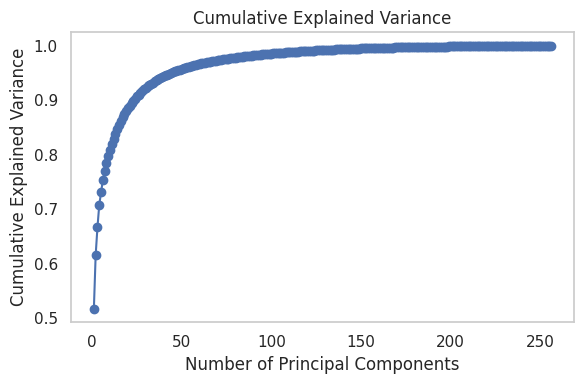

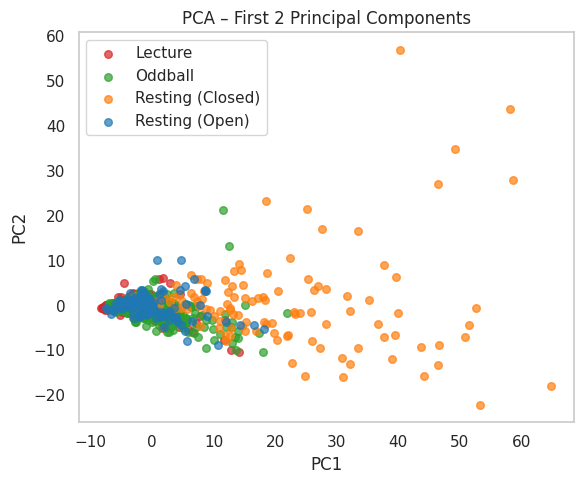

In [173]:
# @title PCA Exploration Before Modeling

# Select features and labels
for_pca_df = df_model_MC.drop(columns=['participant_id', 'paradigm_id'])
df_labels = df_model_MC['paradigm_id']

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(for_pca_df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.tight_layout()
plt.show()

# Convert to DataFrame
principal_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
principal_df['Paradigm'] = df_labels.map({
    1: 'Resting (Open)',
    2: 'Resting (Closed)',
    3: 'Oddball',
    4: 'Lecture'
})

# 2D Plot: First 2 PCs
plt.figure(figsize=(6, 5))
colors = {'Resting (Open)': '#1f77b4', 'Resting (Closed)': '#ff7f0e',
          'Oddball': '#2ca02c', 'Lecture': '#d62728'}

for paradigm, group_df in principal_df.groupby('Paradigm'):
    plt.scatter(group_df['PC1'], group_df['PC2'], label=paradigm,
                alpha=0.7, s=30, color=colors[paradigm])

plt.title('PCA – First 2 Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 3D Plot: Plotly Interactive
fig = px.scatter_3d(
    principal_df,
    x='PC1', y='PC2', z='PC3',
    color='Paradigm',
    title='PCA – First 3 Principal Components',
    color_discrete_map=colors
)
fig.update_traces(marker=dict(size=5, opacity=0.8))
fig.show()


In [ ]:
# @title MLP Model Optimization using Grid Search
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.01, 0.08],
    'learning_rate_init': [0.001, 0.005, 0.01],
    'batch_size': [8, 16, 32],
    'solver': ['adam'],
    'early_stopping': [True],
    'validation_fraction': [0.15],
    'max_iter': [300],
    'random_state': [42]
}

# Initialize base MLP
mlp = MLPClassifier()

# Run Grid Search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2, return_train_score=True)
grid_search.fit(X_train, y_train)

# Extract best model and parameters
best_mlp = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
y_pred_test = best_mlp.predict(X_test)
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
# Classification Report
print("\nClassification Report:")
report_df = pd.DataFrame(classification_report(y_test, y_pred_test, output_dict=True)).T.round(2)
print(report_df)

# Evaluate on train set
y_pred_train = best_mlp.predict(X_train)
print("\nTrain Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.2f}")
# Classification Report
print("\nClassification Report:")
report_df = pd.DataFrame(classification_report(y_train, y_pred_train, output_dict=True)).T.round(2)
print(report_df)

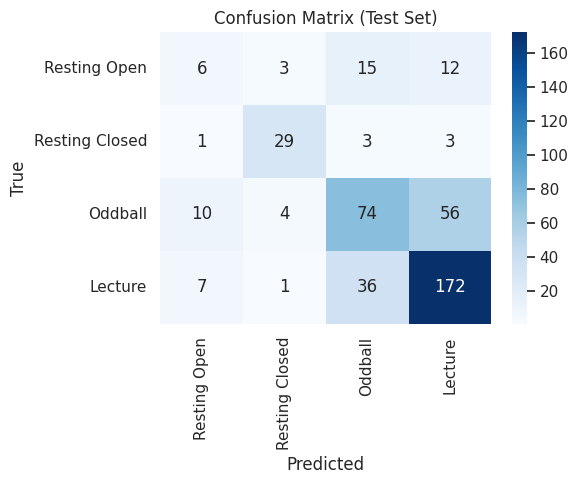

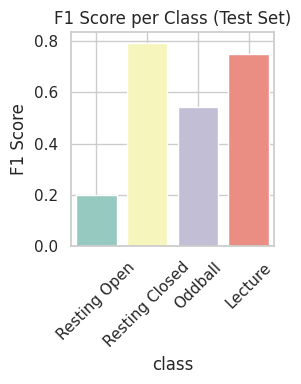

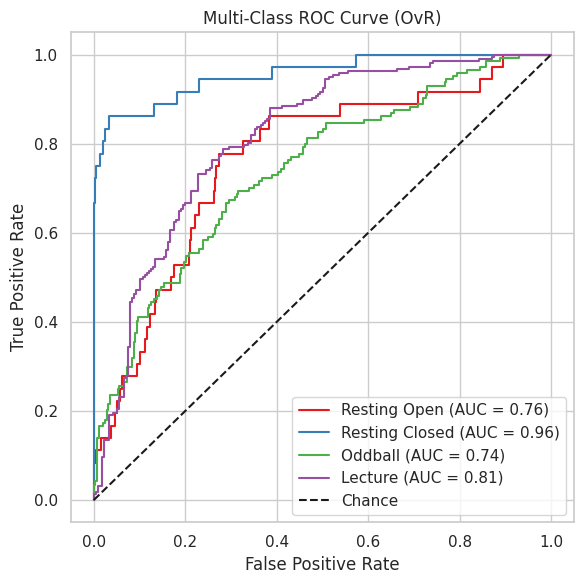

In [208]:
# @title Visualizations of the best MLP
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay

class_labels = {
    1: "Resting Open",
    2: "Resting Closed",
    3: "Oddball",
    4: "Lecture"
}

label_names = [class_labels[i] for i in np.unique(y_test)]

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# --- Classification Report F1 barplot ---
report = classification_report(y_test, y_pred_test, target_names=label_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plot_df = report_df.iloc[:-3].reset_index().rename(columns={'index': 'class'})
plt.figure(figsize=(3, 4))
sns.barplot(data=plot_df, x='class', y='f1-score', hue='class', palette='Set3', dodge=False, legend=False)
plt.title("F1 Score per Class (Test Set)")
plt.xticks(rotation=45)
plt.ylabel("F1 Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- ROC Curve per Class ---
# Binarize labels using same order as class_labels
ordered_classes = np.array(sorted(class_labels.keys()))
y_test_bin = label_binarize(y_test, classes=ordered_classes)
y_score = best_mlp.predict_proba(X_test)

plt.figure(figsize=(6, 6))
cmap = plt.colormaps['Set1']

n_classes = len(class_labels)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    label_name = class_labels[ordered_classes[i]]
    plt.plot(fpr, tpr, label=f'{label_name} (AUC = {roc_auc:.2f})', color=cmap(i))

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title('Multi-Class ROC Curve (OvR)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Removing paradigm_id = 1 (Resting Open) and training model...
Removing paradigm_id = 2 (Resting Closed) and training model...
Removing paradigm_id = 3 (Oddball) and training model...
Removing paradigm_id = 4 (Lecture) and training model...


,Removed_Paradigm,Test_Accuracy
0,Resting Open,0.753281
1,Resting Closed,0.706037
2,Oddball,0.874101
3,Lecture,0.792271


<ipython-input-217-f48c027696cf>:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




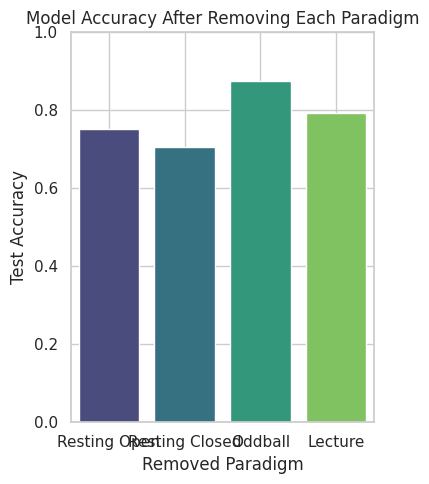

In [217]:
# @title Leave-one-class-out analysis Using the best MLP

# Define mapping for paradigm names
paradigm_names = {
    1: "Resting Open",
    2: "Resting Closed",
    3: "Oddball",
    4: "Lecture"
}

paradigm_ids = df_model_MC['paradigm_id'].unique()
results = []

# Loop through each paradigm ID and remove it to test model robustness
for pid in paradigm_ids:
    print(f"Removing paradigm_id = {pid} ({paradigm_names[pid]}) and training model...")

    # Filter out one paradigm at a time
    df_filtered = df_model_MC[df_model_MC['paradigm_id'] != pid].copy()

    # Split features and labels
    X = df_filtered.drop(columns=['participant_id', 'paradigm_id'])
    y = df_filtered['paradigm_id']

    # Train-test split (same random seed for consistency)
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Train the best model found previously (from GridSearch)
    model = best_mlp
    model.fit(X_train_p, y_train_p)

    # Evaluate on the test set
    y_pred = model.predict(X_test_p)
    acc = accuracy_score(y_test_p, y_pred)

    results.append({
        'Removed_Paradigm': paradigm_names[pid],
        'Test_Accuracy': acc
    })

# Show results as a table
results_df = pd.DataFrame(results)
display(results_df)

# Plot performance per removed paradigm
plt.figure(figsize=(4, 5))
sns.barplot(data=results_df, x='Removed_Paradigm', y='Test_Accuracy', palette='viridis')
plt.ylim(0, 1)
plt.title("Model Accuracy After Removing Each Paradigm")
plt.xlabel("Removed Paradigm")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()